v1.1 subscription levels

if you did not apply the premium package, you only can grab search tweets fo past seven days. 


This API provides access to a variety of different resources including the following:

Tweets
Users
Direct Messages
Lists
Trends
Media
Places
 \\<>
Post and engage with Tweets
Retrieve timelines
Post and receive direct messages
Manage and pull public account information
Create and manage lists
Follow, search, and get users
Retrieve trends


Data dictionary
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/intro-to-tweet-json

https://pypi.org/project/twitter/





In [4]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import datetime
import csv
from tweepy import API
import json
import time
import sys

In [5]:


class SListener(StreamListener):
    def __init__(self, api = None, fprefix = 'streamer'):
        self.api = api or API()
        self.counter = 0
        self.fprefix = fprefix
        self.output  = open('%s_%s.json' % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')), 'w')


    def on_data(self, data):
        if  'in_reply_to_status' in data:
            self.on_status(data)
        elif 'delete' in data:
            delete = json.loads(data)['delete']['status']
            if self.on_delete(delete['id'], delete['user_id']) is False:
                return False
        elif 'limit' in data:
            if self.on_limit(json.loads(data)['limit']['track']) is False:
                return False
        elif 'warning' in data:
            warning = json.loads(data)['warnings']
            print("WARNING: %s" % warning['message'])
            return


    def on_status(self, status):
        self.output.write(status)
        self.counter += 1
        if self.counter >= 20000:
            self.output.close()
            self.output  = open('%s_%s.json' % (self.fprefix, time.strftime('%Y%m%d-%H%M%S')), 'w')
            self.counter = 0
        return


    def on_delete(self, status_id, user_id):
        print("Delete notice")
        return


    def on_limit(self, track):
        print("WARNING: Limitation notice received, tweets missed: %d" % track)
        return


    def on_error(self, status_code):
        print('Encountered error with status code:', status_code)
        return 


    def on_timeout(self):
        print("Timeout, sleeping for 60 seconds...")
        time.sleep(60)
        return 


In [7]:
consumer_key= 'QN8LmwJUJ5pA3cYD3eQAEM4CT'
consumer_secret= 'nTc3InMTStdUhR6IOPsSDvoexcDMzc3ws3cz10aJayH7fYW2PG'

access_token ='716386292-mRx2wF3B8cydlg85YGI7qwvYZLm4qrbRgIn6y6qO'
access_token_secret = 'mKkGQHHJwK1klpyV34ADyQC9MWryxwYNB9l5wIOiCF9ct'

# Consumer key authentication
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

from tweepy import Stream

# Set up words to track
keywords_to_track = ['#rstats', '#python']

# Instantiate the SListener object 
listen = SListener(api)

# Instantiate the Stream object
stream = Stream(auth, listen)

# Begin collecting data
stream.filter(track = keywords_to_track)

KeyboardInterrupt: 

##### Note
The Streaming API only allows real-time data collection on keywords, user IDs, and locations.

In [9]:
# Load JSON
import json
import pandas as pd

# Load JSON
import json

# Convert from JSON to Python object
tweet = json.loads('streamer_20201014-141046.json')

# Print tweet text
print(tweet['text'])

# Print tweet id
print(tweet['id'])
#



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

{"created_at":"Wed Oct 14 18:10:43 +0000 2020","id":1316441320542609408,"id_str":"1316441320542609408","text":"Consolidating old notes: some thoughts, tips and #rstats \ud83d\udce6 for accessibility of HTML pages from #rstats' #rmarkdown\u2026 https:\/\/t.co\/ouIzeaCGsf","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Web App\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":910106475103744000,"id_str":"910106475103744000","name":"Ioannis Kosmidis","screen_name":"IKosmidis_","location":null,"url":"http:\/\/ikosmidis.com","description":"Reader in Data Science at #warwickuni & #turinginst; interested in methods for statistical learning and inference, computing and programming (mainly R & Julia)","translator_type":"none","protected":false,"verified":false,"followers_count":645,"friends_count":134,"listed_count":12,"favourites_count":1673,"statuses_count":487,"created_at":"Tue Sep 19 11:41:07 +0000 2017","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"000000","profile_background_image_url":"http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","profile_background_image_url_https":"https:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","profile_background_tile":false,"profile_link_color":"19CF86","profile_sidebar_border_color":"000000","profile_sidebar_fill_color":"000000","profile_text_color":"000000","profile_use_background_image":false,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/1011676989831434241\/ogjKMkQ6_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/1011676989831434241\/ogjKMkQ6_normal.jpg","default_profile":false,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"is_quote_status":false,"extended_tweet":{"full_text":"Consolidating old notes: some thoughts, tips and #rstats \ud83d\udce6 for accessibility of HTML pages from #rstats' #rmarkdown. Feedback\/comments most welcome.\n\nhttps:\/\/t.co\/vcm7YIPJCc\n\n#accessibility #rstats","display_text_range":[0,197],"entities":{"hashtags":[{"text":"rstats","indices":[49,56]},{"text":"rstats","indices":[96,103]},{"text":"rmarkdown","indices":[105,115]},{"text":"accessibility","indices":[175,189]},{"text":"rstats","indices":[190,197]}],"urls":[{"url":"https:\/\/t.co\/vcm7YIPJCc","expanded_url":"http:\/\/ikosmidis.com\/post\/blog-accessibility\/","display_url":"ikosmidis.com\/post\/blog-acce\u2026","indices":[150,173]}],"user_mentions":[],"symbols":[]}},"quote_count":0,"reply_count":0,"retweet_count":0,"favorite_count":0,"entities":{"hashtags":[{"text":"rstats","indices":[49,56]},{"text":"rstats","indices":[96,103]},{"text":"rmarkdown","indices":[105,115]}],"urls":[{"url":"https:\/\/t.co\/ouIzeaCGsf","expanded_url":"https:\/\/twitter.com\/i\/web\/status\/1316441320542609408","display_url":"twitter.com\/i\/web\/status\/1\u2026","indices":[117,140]}],"user_mentions":[],"symbols":[]},"favorited":false,"retweeted":false,"possibly_sensitive":false,"filter_level":"low","lang":"en","timestamp_ms":"1602699043771"}
{"created_at":"Wed Oct 14 18:10:45 +0000 2020","id":1316441329447170048,"id_str":"1316441329447170048","text":"RT @CouponOnlineCo3: Courses Free Discount - GraphQL with React: The Complete Developers Guide -&gt; https:\/\/t.co\/b7G6o9VnE0\n\n#udemy #coupons\u2026","source":"\u003ca href=\"https:\/\/youngapp.co\" rel=\"nofollow\"\u003eYap Code Learn\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1221691042325508098,"id_str":"1221691042325508098","name":"API Learn Community","screen_name":"api_learnn","location":null,"url":null,"description":"Share great ressources for learn next-gen API on NodeJS \ud83d\udcaa. #serverless #graphql \ud83d\ude4c\ud83d\ude4c","translator_type":"none","protected":false,"verified":false,"followers_count":2086,"friends_count":4536,"listed_count":19,"favourites_count":358,"statuses_count":33067,"created_at":"Mon Jan 27 07:07:15 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"","profile_background_image_url_https":"","profile_background_tile":false,"profile_link_color":"1DA1F2","profile_sidebar_border_color":"C0DEED","profile_sidebar_fill_color":"DDEEF6","profile_text_color":"333333","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/1261829900534775809\/7hzVnb57_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/1261829900534775809\/7hzVnb57_normal.jpg","profile_banner_url":"https:\/\/pbs.twimg.com\/profile_banners\/1221691042325508098\/1580394962","default_profile":true,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"retweeted_status":{"created_at":"Wed Oct 14 17:40:00 +0000 2020","id":1316433588359921667,"id_str":"1316433588359921667","text":"Courses Free Discount - GraphQL with React: The Complete Developers Guide -&gt; https:\/\/t.co\/b7G6o9VnE0\n\n#udemy\u2026 https:\/\/t.co\/a5dXkpDhAY","source":"\u003ca href=\"https:\/\/about.twitter.com\/products\/tweetdeck\" rel=\"nofollow\"\u003eTweetDeck\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1218089591061630977,"id_str":"1218089591061630977","name":"Coupon Online Courses 24","screen_name":"CouponOnlineCo3","location":null,"url":null,"description":"100% Off udemy Coupon , Free Udemy Discount , Online Courses #udemy #discount #Development #business #IT #Software #designer #Marketing #PhotographyIslife #musi","translator_type":"none","protected":false,"verified":false,"followers_count":146,"friends_count":22,"listed_count":3,"favourites_count":0,"statuses_count":1075,"created_at":"Fri Jan 17 08:36:16 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"","profile_background_image_url_https":"","profile_background_tile":false,"profile_link_color":"1DA1F2","profile_sidebar_border_color":"C0DEED","profile_sidebar_fill_color":"DDEEF6","profile_text_color":"333333","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/1218089805566791680\/TcKXBUA-_normal.png","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/1218089805566791680\/TcKXBUA-_normal.png","default_profile":true,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"is_quote_status":false,"extended_tweet":{"full_text":"Courses Free Discount - GraphQL with React: The Complete Developers Guide -&gt; https:\/\/t.co\/b7G6o9VnE0\n\n#udemy #coupons #100DaysOfCode #webdevelopment #javascript #React #Nodejs #css3 #vuejs #PHP #Angular #bootstrap4 #html5 #redux #Django #Python #MongoDB","display_text_range":[0,256],"entities":{"hashtags":[{"text":"udemy","indices":[105,111]},{"text":"coupons","indices":[112,120]},{"text":"100DaysOfCode","indices":[121,135]},{"text":"webdevelopment","indices":[136,151]},{"text":"javascript","indices":[152,163]},{"text":"React","indices":[164,170]},{"text":"Nodejs","indices":[171,178]},{"text":"css3","indices":[179,184]},{"text":"vuejs","indices":[185,191]},{"text":"PHP","indices":[192,196]},{"text":"Angular","indices":[197,205]},{"text":"bootstrap4","indices":[206,217]},{"text":"html5","indices":[218,224]},{"text":"redux","indices":[225,231]},{"text":"Django","indices":[232,239]},{"text":"Python","indices":[240,247]},{"text":"MongoDB","indices":[248,256]}],"urls":[{"url":"https:\/\/t.co\/b7G6o9VnE0","expanded_url":"https:\/\/coupononlinecourses.blogspot.com\/2018\/06\/graphql-with-react-complete-developers-guide.html","display_url":"coupononlinecourses.blogspot.com\/2018\/06\/graphq\u2026","indices":[80,103]}],"user_mentions":[],"symbols":[]}},"quote_count":0,"reply_count":0,"retweet_count":1,"favorite_count":1,"entities":{"hashtags":[{"text":"udemy","indices":[105,111]}],"urls":[{"url":"https:\/\/t.co\/b7G6o9VnE0","expanded_url":"https:\/\/coupononlinecourses.blogspot.com\/2018\/06\/graphql-with-react-complete-developers-guide.html","display_url":"coupononlinecourses.blogspot.com\/2018\/06\/graphq\u2026","indices":[80,103]},{"url":"https:\/\/t.co\/a5dXkpDhAY","expanded_url":"https:\/\/twitter.com\/i\/web\/status\/1316433588359921667","display_url":"twitter.com\/i\/web\/status\/1\u2026","indices":[113,136]}],"user_mentions":[],"symbols":[]},"favorited":false,"retweeted":false,"possibly_sensitive":false,"filter_level":"low","lang":"en"},"is_quote_status":false,"quote_count":0,"reply_count":0,"retweet_count":0,"favorite_count":0,"entities":{"hashtags":[{"text":"udemy","indices":[126,132]},{"text":"coupons","indices":[133,141]}],"urls":[{"url":"https:\/\/t.co\/b7G6o9VnE0","expanded_url":"https:\/\/coupononlinecourses.blogspot.com\/2018\/06\/graphql-with-react-complete-developers-guide.html","display_url":"coupononlinecourses.blogspot.com\/2018\/06\/graphq\u2026","indices":[101,124]}],"user_mentions":[{"screen_name":"CouponOnlineCo3","name":"Coupon Online Courses 24","id":1218089591061630977,"id_str":"1218089591061630977","indices":[3,19]}],"symbols":[]},"favorited":false,"retweeted":false,"possibly_sensitive":false,"filter_level":"low","lang":"en","timestamp_ms":"1602699045894"}
{"created_at":"Wed Oct 14 18:11:12 +0000 2020","id":1316441442907312129,"id_str":"1316441442907312129","text":"#100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming\u2026 https:\/\/t.co\/ANwmkShwLO","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1248615252201066510,"id_str":"1248615252201066510","name":"Alexandru Rosu","screen_name":"AlexRosu1989","location":null,"url":null,"description":"Software Engineer with a strong passion for programming and technology.","translator_type":"none","protected":false,"verified":false,"followers_count":46,"friends_count":1,"listed_count":1,"favourites_count":1,"statuses_count":565,"created_at":"Fri Apr 10 14:14:21 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"","profile_background_image_url_https":"","profile_background_tile":false,"profile_link_color":"1DA1F2","profile_sidebar_border_color":"C0DEED","profile_sidebar_fill_color":"DDEEF6","profile_text_color":"333333","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/1248616265817575433\/sbyanIfV_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/1248616265817575433\/sbyanIfV_normal.jpg","default_profile":true,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"is_quote_status":false,"extended_tweet":{"full_text":"#100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming #ArtificialIntelligence  #Serverless #coding #Cloud #code #web #Python #DEVCommunity #udemyfree #Software #IoT\n\nGet to know AI\n\nhttps:\/\/t.co\/GSVPrnokx8","display_text_range":[0,260],"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[0,14]},{"text":"100DaysOfCloud","indices":[15,30]},{"text":"100DaysOfMLCode","indices":[31,47]},{"text":"java","indices":[48,53]},{"text":"code","indices":[54,59]},{"text":"CodeNewbie","indices":[60,71]},{"text":"developer","indices":[73,83]},{"text":"javascript","indices":[84,95]},{"text":"programming","indices":[96,108]},{"text":"ArtificialIntelligence","indices":[109,132]},{"text":"Serverless","indices":[134,145]},{"text":"coding","indices":[146,153]},{"text":"Cloud","indices":[154,160]},{"text":"code","indices":[161,166]},{"text":"web","indices":[167,171]},{"text":"Python","indices":[172,179]},{"text":"DEVCommunity","indices":[180,193]},{"text":"udemyfree","indices":[194,204]},{"text":"Software","indices":[205,214]},{"text":"IoT","indices":[215,219]}],"urls":[{"url":"https:\/\/t.co\/GSVPrnokx8","expanded_url":"https:\/\/www.udemy.com\/course\/build-a-google-assistant-app-using-java-and-spring-boot\/?couponCode=PROMOTE_AI","display_url":"udemy.com\/course\/build-a\u2026","indices":[237,260]}],"user_mentions":[],"symbols":[]}},"quote_count":0,"reply_count":0,"retweet_count":0,"favorite_count":0,"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[0,14]},{"text":"100DaysOfCloud","indices":[15,30]},{"text":"100DaysOfMLCode","indices":[31,47]},{"text":"java","indices":[48,53]},{"text":"code","indices":[54,59]},{"text":"CodeNewbie","indices":[60,71]},{"text":"developer","indices":[73,83]},{"text":"javascript","indices":[84,95]},{"text":"programming","indices":[96,108]}],"urls":[{"url":"https:\/\/t.co\/ANwmkShwLO","expanded_url":"https:\/\/twitter.com\/i\/web\/status\/1316441442907312129","display_url":"twitter.com\/i\/web\/status\/1\u2026","indices":[110,133]}],"user_mentions":[],"symbols":[]},"favorited":false,"retweeted":false,"possibly_sensitive":false,"filter_level":"low","lang":"en","timestamp_ms":"1602699072945"}
{"created_at":"Wed Oct 14 18:11:18 +0000 2020","id":1316441464847687687,"id_str":"1316441464847687687","text":"RT @AlexRosu1989: #100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming #ArtificialI\u2026","source":"\u003ca href=\"http:\/\/localhost.com\" rel=\"nofollow\"\u003eServerless Tweet\/Retweet Bot\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":971620109197312000,"id_str":"971620109197312000","name":"Serverless Fan","screen_name":"ServerlessFan","location":"Sri Lanka","url":null,"description":"#Serverless #Computing","translator_type":"none","protected":false,"verified":false,"followers_count":3278,"friends_count":6,"listed_count":126,"favourites_count":7,"statuses_count":270196,"created_at":"Thu Mar 08 05:34:20 +0000 2018","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"000000","profile_background_image_url":"http:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","profile_background_image_url_https":"https:\/\/abs.twimg.com\/images\/themes\/theme1\/bg.png","profile_background_tile":false,"profile_link_color":"000000","profile_sidebar_border_color":"000000","profile_sidebar_fill_color":"000000","profile_text_color":"000000","profile_use_background_image":false,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/973611685822058497\/yRRo9D52_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/973611685822058497\/yRRo9D52_normal.jpg","profile_banner_url":"https:\/\/pbs.twimg.com\/profile_banners\/971620109197312000\/1525426121","default_profile":false,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"retweeted_status":{"created_at":"Wed Oct 14 18:11:12 +0000 2020","id":1316441442907312129,"id_str":"1316441442907312129","text":"#100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming\u2026 https:\/\/t.co\/ANwmkShwLO","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1248615252201066510,"id_str":"1248615252201066510","name":"Alexandru Rosu","screen_name":"AlexRosu1989","location":null,"url":null,"description":"Software Engineer with a strong passion for programming and technology.","translator_type":"none","protected":false,"verified":false,"followers_count":46,"friends_count":1,"listed_count":1,"favourites_count":1,"statuses_count":565,"created_at":"Fri Apr 10 14:14:21 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"","profile_background_image_url_https":"","profile_background_tile":false,"profile_link_color":"1DA1F2","profile_sidebar_border_color":"C0DEED","profile_sidebar_fill_color":"DDEEF6","profile_text_color":"333333","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/1248616265817575433\/sbyanIfV_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/1248616265817575433\/sbyanIfV_normal.jpg","default_profile":true,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"is_quote_status":false,"extended_tweet":{"full_text":"#100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming #ArtificialIntelligence  #Serverless #coding #Cloud #code #web #Python #DEVCommunity #udemyfree #Software #IoT\n\nGet to know AI\n\nhttps:\/\/t.co\/GSVPrnokx8","display_text_range":[0,260],"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[0,14]},{"text":"100DaysOfCloud","indices":[15,30]},{"text":"100DaysOfMLCode","indices":[31,47]},{"text":"java","indices":[48,53]},{"text":"code","indices":[54,59]},{"text":"CodeNewbie","indices":[60,71]},{"text":"developer","indices":[73,83]},{"text":"javascript","indices":[84,95]},{"text":"programming","indices":[96,108]},{"text":"ArtificialIntelligence","indices":[109,132]},{"text":"Serverless","indices":[134,145]},{"text":"coding","indices":[146,153]},{"text":"Cloud","indices":[154,160]},{"text":"code","indices":[161,166]},{"text":"web","indices":[167,171]},{"text":"Python","indices":[172,179]},{"text":"DEVCommunity","indices":[180,193]},{"text":"udemyfree","indices":[194,204]},{"text":"Software","indices":[205,214]},{"text":"IoT","indices":[215,219]}],"urls":[{"url":"https:\/\/t.co\/GSVPrnokx8","expanded_url":"https:\/\/www.udemy.com\/course\/build-a-google-assistant-app-using-java-and-spring-boot\/?couponCode=PROMOTE_AI","display_url":"udemy.com\/course\/build-a\u2026","indices":[237,260]}],"user_mentions":[],"symbols":[]}},"quote_count":0,"reply_count":0,"retweet_count":1,"favorite_count":0,"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[0,14]},{"text":"100DaysOfCloud","indices":[15,30]},{"text":"100DaysOfMLCode","indices":[31,47]},{"text":"java","indices":[48,53]},{"text":"code","indices":[54,59]},{"text":"CodeNewbie","indices":[60,71]},{"text":"developer","indices":[73,83]},{"text":"javascript","indices":[84,95]},{"text":"programming","indices":[96,108]}],"urls":[{"url":"https:\/\/t.co\/ANwmkShwLO","expanded_url":"https:\/\/twitter.com\/i\/web\/status\/1316441442907312129","display_url":"twitter.com\/i\/web\/status\/1\u2026","indices":[110,133]}],"user_mentions":[],"symbols":[]},"favorited":false,"retweeted":false,"possibly_sensitive":false,"filter_level":"low","lang":"en"},"is_quote_status":false,"quote_count":0,"reply_count":0,"retweet_count":0,"favorite_count":0,"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[18,32]},{"text":"100DaysOfCloud","indices":[33,48]},{"text":"100DaysOfMLCode","indices":[49,65]},{"text":"java","indices":[66,71]},{"text":"code","indices":[72,77]},{"text":"CodeNewbie","indices":[78,89]},{"text":"developer","indices":[91,101]},{"text":"javascript","indices":[102,113]},{"text":"programming","indices":[114,126]}],"urls":[],"user_mentions":[{"screen_name":"AlexRosu1989","name":"Alexandru Rosu","id":1248615252201066510,"id_str":"1248615252201066510","indices":[3,16]}],"symbols":[]},"favorited":false,"retweeted":false,"filter_level":"low","lang":"en","timestamp_ms":"1602699078176"}
{"created_at":"Wed Oct 14 18:11:18 +0000 2020","id":1316441464885448704,"id_str":"1316441464885448704","text":"RT @AlexRosu1989: #100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming #ArtificialI\u2026","source":"\u003ca href=\"https:\/\/dreamsofimran.in\" rel=\"nofollow\"\u003eTheDeveloperBot\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1250164632968298497,"id_str":"1250164632968298497","name":"The Developer Bot","screen_name":"TheDeveloperBot","location":null,"url":null,"description":"I'm a bot created by @DreamsOfImran with a little bit of NodeJs and lots of \u2764\ufe0f\nI like and retweet posts related to #javascript, #vuejs, #reactjs, #Nodejs & etc","translator_type":"none","protected":false,"verified":false,"followers_count":1747,"friends_count":1,"listed_count":47,"favourites_count":119419,"statuses_count":325278,"created_at":"Tue Apr 14 20:51:03 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"","profile_background_image_url_https":"","profile_background_tile":false,"profile_link_color":"1DA1F2","profile_sidebar_border_color":"C0DEED","profile_sidebar_fill_color":"DDEEF6","profile_text_color":"333333","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/1250454907871580162\/Al-vkUN1_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/1250454907871580162\/Al-vkUN1_normal.jpg","profile_banner_url":"https:\/\/pbs.twimg.com\/profile_banners\/1250164632968298497\/1586966908","default_profile":true,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"retweeted_status":{"created_at":"Wed Oct 14 18:11:12 +0000 2020","id":1316441442907312129,"id_str":"1316441442907312129","text":"#100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming\u2026 https:\/\/t.co\/ANwmkShwLO","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1248615252201066510,"id_str":"1248615252201066510","name":"Alexandru Rosu","screen_name":"AlexRosu1989","location":null,"url":null,"description":"Software Engineer with a strong passion for programming and technology.","translator_type":"none","protected":false,"verified":false,"followers_count":46,"friends_count":1,"listed_count":1,"favourites_count":1,"statuses_count":565,"created_at":"Fri Apr 10 14:14:21 +0000 2020","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":null,"contributors_enabled":false,"is_translator":false,"profile_background_color":"F5F8FA","profile_background_image_url":"","profile_background_image_url_https":"","profile_background_tile":false,"profile_link_color":"1DA1F2","profile_sidebar_border_color":"C0DEED","profile_sidebar_fill_color":"DDEEF6","profile_text_color":"333333","profile_use_background_image":true,"profile_image_url":"http:\/\/pbs.twimg.com\/profile_images\/1248616265817575433\/sbyanIfV_normal.jpg","profile_image_url_https":"https:\/\/pbs.twimg.com\/profile_images\/1248616265817575433\/sbyanIfV_normal.jpg","default_profile":true,"default_profile_image":false,"following":null,"follow_request_sent":null,"notifications":null},"geo":null,"coordinates":null,"place":null,"contributors":null,"is_quote_status":false,"extended_tweet":{"full_text":"#100DaysOfCode #100DaysOfCloud #100DaysOfMLCode #java #code #CodeNewbie  #developer #javascript #programming #ArtificialIntelligence  #Serverless #coding #Cloud #code #web #Python #DEVCommunity #udemyfree #Software #IoT\n\nGet to know AI\n\nhttps:\/\/t.co\/GSVPrnokx8","display_text_range":[0,260],"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[0,14]},{"text":"100DaysOfCloud","indices":[15,30]},{"text":"100DaysOfMLCode","indices":[31,47]},{"text":"java","indices":[48,53]},{"text":"code","indices":[54,59]},{"text":"CodeNewbie","indices":[60,71]},{"text":"developer","indices":[73,83]},{"text":"javascript","indices":[84,95]},{"text":"programming","indices":[96,108]},{"text":"ArtificialIntelligence","indices":[109,132]},{"text":"Serverless","indices":[134,145]},{"text":"coding","indices":[146,153]},{"text":"Cloud","indices":[154,160]},{"text":"code","indices":[161,166]},{"text":"web","indices":[167,171]},{"text":"Python","indices":[172,179]},{"text":"DEVCommunity","indices":[180,193]},{"text":"udemyfree","indices":[194,204]},{"text":"Software","indices":[205,214]},{"text":"IoT","indices":[215,219]}],"urls":[{"url":"https:\/\/t.co\/GSVPrnokx8","expanded_url":"https:\/\/www.udemy.com\/course\/build-a-google-assistant-app-using-java-and-spring-boot\/?couponCode=PROMOTE_AI","display_url":"udemy.com\/course\/build-a\u2026","indices":[237,260]}],"user_mentions":[],"symbols":[]}},"quote_count":0,"reply_count":0,"retweet_count":1,"favorite_count":0,"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[0,14]},{"text":"100DaysOfCloud","indices":[15,30]},{"text":"100DaysOfMLCode","indices":[31,47]},{"text":"java","indices":[48,53]},{"text":"code","indices":[54,59]},{"text":"CodeNewbie","indices":[60,71]},{"text":"developer","indices":[73,83]},{"text":"javascript","indices":[84,95]},{"text":"programming","indices":[96,108]}],"urls":[{"url":"https:\/\/t.co\/ANwmkShwLO","expanded_url":"https:\/\/twitter.com\/i\/web\/status\/1316441442907312129","display_url":"twitter.com\/i\/web\/status\/1\u2026","indices":[110,133]}],"user_mentions":[],"symbols":[]},"favorited":false,"retweeted":false,"possibly_sensitive":false,"filter_level":"low","lang":"en"},"is_quote_status":false,"quote_count":0,"reply_count":0,"retweet_count":0,"favorite_count":0,"entities":{"hashtags":[{"text":"100DaysOfCode","indices":[18,32]},{"text":"100DaysOfCloud","indices":[33,48]},{"text":"100DaysOfMLCode","indices":[49,65]},{"text":"java","indices":[66,71]},{"text":"code","indices":[72,77]},{"text":"CodeNewbie","indices":[78,89]},{"text":"developer","indices":[91,101]},{"text":"javascript","indices":[102,113]},{"text":"programming","indices":[114,126]}],"urls":[],"user_mentions":[{"screen_name":"AlexRosu1989","name":"Alexandru Rosu","id":1248615252201066510,"id_str":"1248615252201066510","indices":[3,16]}],"symbols":[]},"favorited":false,"retweeted":false,"filter_level":"low","lang":"en","timestamp_ms":"1602699078185"}


I was supposed to see this kind of format.
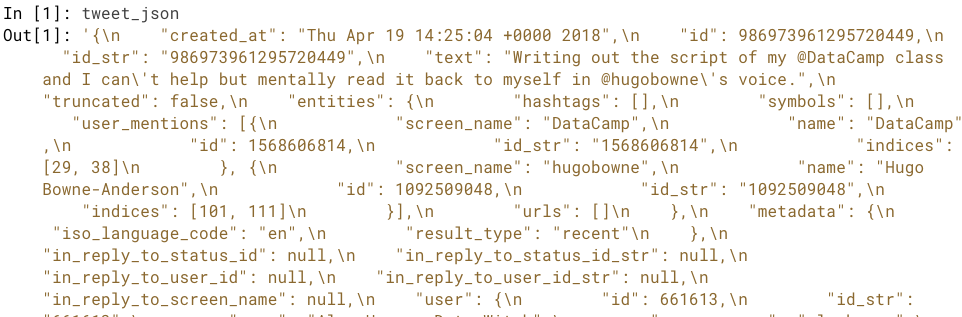

and after I read the json. I will get following format.

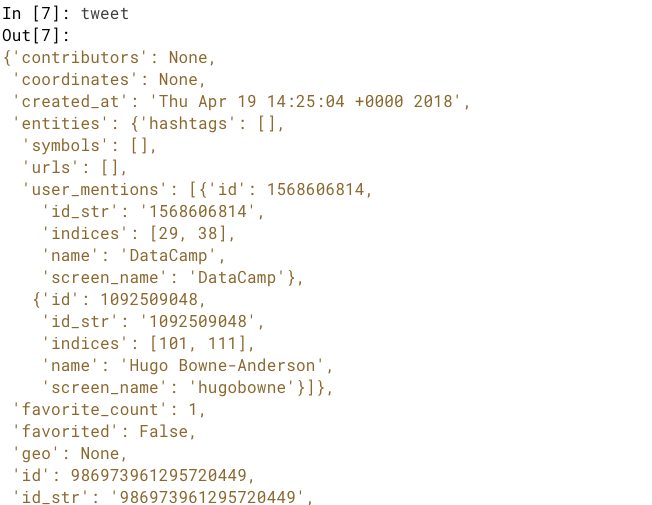

In [ ]:
################
################
#option2

#with open('streamer_20201013-162349.json',mode='rb') as json_file:
#    data_list = json.load(json_file)

#tweet_data_frame = pd.DataFrame.from_dict(data_list)
#print(tweet_data_frame)
#print(data_list)

################
################
#option3
#dat=list()
#with open ('streamer_20201013-162349.json', 'r') as f:
#    for l in f.readlines():
#        if not l.strip (): # skip empty lines
#            continue#

#        json_data = json.loads (l)
#        dat.append(json_data)

# Print tweet text


In [ ]:

# Print tweet text
print(tweet['text'])

# Print tweet id
print(tweet['id'])

# Print user handle
print(tweet['user']['screen_name'])

# Print user follower count
print(tweet['user']['followers_count'])

# Print user location
print(tweet['user']['location'])

# Print user description
print(tweet['user']['description'])

# Print the text of the tweet
print(rt['text'])

# Print the text of tweet which has been retweeted
print(rt['retweeted_status']['text'])

# Print the user handle of the tweet
print(rt['user']['screen_name'])

# Print the user handle of the tweet which has been retweeted
print(rt['retweeted_status']['user']['screen_name'])

# Print the tweet text
print(quoted_tweet['text'])

# Print the quoted tweet text
print(quoted_tweet['quoted_status']['text'])

# Print the quoted tweet's extended (140+) text
print(quoted_tweet['quoted_status']['extended_tweet']['full_text'])

# Print the quoted user location
print(quoted_tweet['quoted_status']['user']['location'])

In [ ]:
#Flattening Twitter Json
# Store the user screen_name in 'user-screen_name'
quoted_tweet['user-screen_name'] = quoted_tweet['user']['screen_name']

# Store the quoted_status text in 'quoted_status-text'
quoted_tweet['quoted_status-text'] = quoted_tweet['quoted_status']['text']

# Store the quoted tweet's extended (140+) text in 
# 'quoted_status-extended_tweet-full_text'
quoted_tweet['quoted_status-extended_tweet-full_text'] = quoted_tweet['quoted_status']['extended_tweet']['full_text']

In [ ]:
def flatten_tweets(tweets_json):
    """ Flattens out tweet dictionaries so relevant JSON
        is in a top-level dictionary."""
    tweets_list = []
    
    # Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)
    
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
    
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj['quoted_status-extended_tweet-full_text'] = tweet_obj['quoted_status']['extended_tweet']['full_text']
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = tweet_obj['retweeted_status']['text']
            
        tweets_list.append(tweet_obj)

In [ ]:
# Import pandas
import pandas as pd

# Flatten the tweets and store in `tweets`
tweets = flatten_tweets(data_science_json)

# Create a DataFrame from `tweets`
ds_tweets = pd.DataFrame(tweets)

# Print out the first 5 tweets from this dataset
print(ds_tweets['text'].values[0:5])

In [ ]:
# Flatten the tweets and store them
flat_tweets = flatten_tweets(data_science_json)

# Convert to DataFrame
ds_tweets = pd.DataFrame(flat_tweets)

# Find mentions of #python in 'text'
python = ds_tweets['text'].str.contains('#python', case=False)

# Print proportion of tweets mentioning #python
print("Proportion of #python tweets:", np.sum('#python') / ds_tweets.shape[0])

In [ ]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text and extended tweet (140+ character tweets) for tweets,
    retweets and quoted tweets.
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    contains_column |= data['extended_tweet-full_text'].str.contains(word, case = False)
    contains_column |= data['quoted_status-text'].str.contains(word, case = False) 
    contains_column |= data['quoted_status-extended_tweet-full_text'].str.contains(word, case = False) 
    contains_column |= data['retweeted_status-text'].str.contains(word, case = False) 
    contains_column |= data['retweeted_status-extended_tweet-full_text'].str.contains(word, case = False)
    return contains_column

# Create a python column
ds_tweets['python'] = check_word_in_tweet('#python', ds_tweets)

# Create an rstats column
ds_tweets['rstats'] = check_word_in_tweet('#rstats', ds_tweets)



In [ ]:
# Print created_at to see the original format of datetime in Twitter data
print(ds_tweets['created_at'].head())

# Convert the created_at column to np.datetime object
ds_tweets['created_at'] = pd.to_datetime(ds_tweets['created_at'] )

# Print created_at to see new format
print(ds_tweets['created_at'].head())

# Set the index of ds_tweets to created_at
ds_tweets = ds_tweets.set_index('created_at')

In [ ]:
# Average of python column by day
mean_python = ds_tweets['python'].resample('1 d').mean()

# Average of rstats column by day
mean_rstats = ds_tweets['rstats'].resample('1 d').mean()

# Plot mean python/rstats by day
plt.plot(mean_python.index.day, mean_python, color = 'green')
plt.plot(mean_rstats.index.day, mean_rstats, color = 'blue')

# Add labels and show
plt.xlabel('Day'); plt.ylabel('Frequency')
plt.title('Language mentions over time')
plt.legend(('#python', '#rstats'))
plt.show()

In [ ]:
##Sentiment Analysis in Twitter Dataset

In [ ]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = ds_tweets['text'].apply(sid.polarity_scores)

In [ ]:
# Print out the text of a positive tweet
print(ds_tweets[sentiment > 0.6]['text'].values[0])

# Print out the text of a negative tweet
print(ds_tweets[sentiment < -0.6]['text'].values[0])

# Generate average sentiment scores for #python
sentiment_py = sentiment[ check_word_in_tweet('#python', ds_tweets) ].resample('1 d').mean()

# Generate average sentiment scores for #rstats
sentiment_r = sentiment[ check_word_in_tweet('#rstats', ds_tweets) ].resample('1 d').mean()

# Import matplotlib
import matplotlib.pyplot as plt

# Plot average #python sentiment per day
plt.plot(sentiment_py.index.day,sentiment_py,  color = 'green')

# Plot average #rstats sentiment per day
plt.plot(sentiment_r.index.day, sentiment_r, color = 'blue')

plt.xlabel('Day')
plt.ylabel('Sentiment')
plt.title('Sentiment of data science languages')
plt.legend(('#python', '#rstats'))
plt.show()

In [ ]:
import networkx as nx
## flatten and convert JSON
G_rt = nx.form_pandas_edgelist(
                tweets,
                source= 'user-screen_name',
                target = 'retweeted_status-user-screen_name',
                create_using = nx.DiGraph())
 
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))


import networkx as nx
## flatten and convert JSON
G_rt = nx.form_pandas_edgelist(
                tweets,
                source= 'user-screen_name',
                target='quoted_status-user-screen_name',
                create_using=nx.DiGraph())

import networkx as nx
## flatten and convert JSON
# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    sotu_replies,
                source= 'user-screen_name',
                target='in_reply_to_screen_name',
                create_using=nx.DiGraph())
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

In [ ]:
#visualization
nx.draw_networkx(T)
plt.axis('off')
size=
[x[1]*100 for x in T.degree()]


################################
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

who is the most important user: Centrality. most import node.
    
Degree of centrality in degree and out degree
In-Degree ()
Out-Degree (retweet)
bc=nx.betweenness_centrality(T)



In [ ]:
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Generate in-degree centrality for replies 
reply_centrality = nx.in_degree_centrality(G_reply)

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

In [ ]:
##networkx has been imported as nx. The networks G_rt and G_reply, 
## and column_names = ['screen_name', 'betweenness_centrality']


# Generate betweenness centrality for retweets 
rt_centrality = nx.betweenness_centrality(G_rt)

# Generate betweenness centrality for replies 
reply_centrality = nx.betweenness_centrality(G_reply)

# Store centralities in data frames
rt = pd.DataFrame( rt_centrality.items(), columns = column_names)
reply = pd.DataFrame(reply_centrality.items(),columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('betweenness_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('betweenness_centrality', ascending = False).head())


# Calculate in-degrees and store in DataFrame
degree_rt = pd.DataFrame(list(G_rt.in_degree()), columns = column_names)
degree_reply = pd.DataFrame(list(G_reply.in_degree()), columns = column_names)

# Merge the two DataFrames on screen name
ratio = degree_rt.merge(degree_reply, on = 'screen_name', suffixes = ('_rt', '_reply'))

# Calculate the ratio
ratio['ratio'] = ratio['degree_reply'] / ratio['degree_rt']

# Exclude any tweets with less than 5 retweets
ratio = ratio[ratio['degree_rt'] >= 5]

# Print out first five with highest ratio
print(ratio.sort_values('ratio', ascending = False).head())

### TWITTER and GEO in Python 
In this exercise, you're going extract the user-defined location from a single example tweet as well as a large set of tweets. We've added another line to our flatten_tweets() function which will allow you to access user-defined location within the data frame.

tweet_obj['user-location'] = tweet_obj['user']['location']
In addition, the single tweet in JSON format tweet_json and the State of the Union tweets in JSON format tweets_sotu_json have been loaded for you.

In [ ]:
# Print out the location of a single tweet
print(tweet_json['user']['location'])

# Flatten and load the SOTU tweets into a dataframe
tweets_sotu = pd.DataFrame(flatten_tweets(tweets_sotu_json))

# Print out top five user-defined locations
print(tweets_sotu['user-location'].value_counts().head())



def getBoundingBox(place):
    """ Returns the bounding box coordinates."""
    return place['bounding_box']['coordinates']

# Apply the function which gets bounding box coordinates
bounding_boxes = tweets_sotu['place'].apply(getBoundingBox)

# Print out the first bounding box coordinates
print(bounding_boxes.values[0])


def calculateCentroid(place):
    """ Calculates the centroid from a bounding box."""
    # Obtain the coordinates from the bounding box.
    coordinates = place['bounding_box']['coordinates'][0]
        
    longs = np.unique( [x[0] for x in coordinates] )
    lats  = np.unique( [x[1] for x in coordinates] )

    if len(longs) == 1 and len(lats) == 1:
        # return a single coordinate
        return (longs[0], lats[0])
    elif len(longs) == 2 and len(lats) == 2:
        # If we have two longs and lats, we have a box.
        central_long = np.sum(longs) / 2
        central_lat  =np.sum(lats) / 2
    else:
        raise ValueError("Non-rectangular polygon not supported: %s" % 
            ",".join(map(lambda x: str(x), coordinates)) )

    return (central_long, central_lat)
    
# Calculate the centroids of place     
centroids = tweets_sotu['place'].apply(calculateCentroid)

In [ ]:
## draw the map using twitter data

In [ ]:
# Import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Set up the US bounding box
us_boundingbox = [-125, 22, -64, 50] 

# Set up the Basemap object
m = Basemap(llcrnrlon = us_boundingbox[0],
            llcrnrlat = us_boundingbox[1],
            urcrnrlon = us_boundingbox[2],
            urcrnrlat = us_boundingbox[3],
            projection='merc')

# Draw continents in white,
# coastlines and countries in gray
m.fillcontinents(color='white')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Draw the states and show the plot
m.drawstates(color='gray')
plt.show()



# Calculate the centroids for the dataset
# and isolate longitudue and latitudes
centroids = tweets_sotu['place'].apply(calculateCentroid)
lon = [x[0] for x in centroids]
lat = [x[1] for x in centroids]

# Draw continents, coastlines, countries, and states
m.fillcontinents(color='white', zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Draw the points and show the plot
m.scatter(lon, lat, latlon = True, alpha = 0.7)
plt.show()



############

# Generate sentiment scores
sentiment_scores = tweets_sotu['text'].apply(sid.polarity_scores)

# Isolate the compound element
sentiment_scores = [x['compound'] for x in sentiment_scores]

# Draw the points
m.scatter(lon, lat, latlon = True, 
           c = sentiment_scores,
           cmap = 'coolwarm', alpha = 0.7)

# Show the plot
plt.show()